## Central-Parietal Channels Beta & Alpha Band Power

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
TARGET_CH = [
    # Central
    'C3','C1','C5','CZ','C4','C6','C2',
    # Parietal / Centro-parietal
    'CP5','CP1','CP3','CPZ','CP6','CP2',
    'P3','P7','P1','P5','P4','P8','P6','P2'
]

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

beta_data = []
moca_vals_list = []

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    # Standardize channel names: strip whitespace, uppercase
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    target_upper = [ch.strip().upper() for ch in TARGET_CH]
    matched_chs = df.loc[df['channel_clean'].isin(target_upper)]

    if matched_chs.empty:
        print(f"{subj}: no target channels matched in CSV")
        print("Available channels:", df['channel_clean'].unique())
        continue

    # Average beta_abs across matched channels and epochs
    beta_mean = matched_chs['beta_abs'].mean()
    beta_data.append(beta_mean)

    # Get MoCA
    moca_vals = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca_vals) == 0 or np.isnan(moca_vals[0]):
        continue
    moca_vals_list.append(moca_vals[0])

beta_data = np.array(beta_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = beta_data[labels == 1]
unimpaired = beta_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(beta_data, moca_vals_list)

print(f"Beta_abs power averaged across central–parietal channels | Cohort counts (PD only): {len(beta_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Beta_abs power averaged across central–parietal channels | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=5.22435e-12, std=2.94428e-12
Unimpaired mean=5.73981e-12, std=4.0324e-12
t=-0.715, p=0.476798, Spearman rho=0.009, p=0.928229


### Alpha

In [4]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
PARIETAL_CH = ['P2','P3','P4','P5','P6','P7','P8','PO3','PO4','POZ']
ALPHA_COLS = ['alpha1_abs', 'alpha2_abs']

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[(meta['GROUP'] == 'PD') & (meta['MOCA'].notna()), 'participant_id'].tolist()

alpha_data = []
moca_vals_list = []

parietal_upper = [ch.strip().upper() for ch in PARIETAL_CH]

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    matched_chs = df.loc[df['channel_clean'].isin(parietal_upper)]

    if matched_chs.empty:
        print(f"{subj}: no parietal channels matched in CSV")
        print("Available channels:", df['channel_clean'].unique())
        continue

    # Ensure alpha columns exist
    missing_cols = [col for col in ALPHA_COLS if col not in matched_chs.columns]
    if missing_cols:
        print(f"{subj}: missing alpha columns {missing_cols}")
        continue

    # Compute mean alpha power across selected channels
    alpha_mean = matched_chs[ALPHA_COLS].sum(axis=1).mean()
    alpha_data.append(alpha_mean)

    # Get MoCA
    moca_val = meta.loc[meta['participant_id'] == subj, 'MOCA'].values[0]
    moca_vals_list.append(moca_val)

alpha_data = np.array(alpha_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = alpha_data[labels == 1]
unimpaired = alpha_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(alpha_data, moca_vals_list)

print(f"Alpha_abs power averaged across parietal channels | Cohort counts (PD only): {len(alpha_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Alpha_abs power averaged across parietal channels | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=5.91596e-12, std=6.47155e-12
Unimpaired mean=7.266e-12, std=8.89164e-12
t=-0.850, p=0.397906, Spearman rho=0.038, p=0.708453


### Delta increased delta central parietal region

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
CENTRAL_PAR_CH = [
    # Central
    'C3','C1','C5','CZ','C4','C6','C2',
    # Parietal / Centro-parietal
    'CP5','CP1','CP3','CPZ','CP6','CP2',
    'P3','P7','P1','P5','P4','P8','P6','P2'
]
DELTA_COL = 'delta_abs'  # assuming the CSV has a column named 'delta_abs'

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[(meta['GROUP'] == 'PD') & (meta['MOCA'].notna()), 'participant_id'].tolist()

delta_data = []
moca_vals_list = []

central_par_upper = [ch.strip().upper() for ch in CENTRAL_PAR_CH]

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    matched_chs = df.loc[df['channel_clean'].isin(central_par_upper)]

    if matched_chs.empty:
        print(f"{subj}: no central-parietal channels matched in CSV")
        print("Available channels:", df['channel_clean'].unique())
        continue

    if DELTA_COL not in matched_chs.columns:
        print(f"{subj}: missing column {DELTA_COL}")
        continue

    # Compute mean delta power across selected channels
    delta_mean = matched_chs[DELTA_COL].mean()
    delta_data.append(delta_mean)

    # Get MoCA
    moca_val = meta.loc[meta['participant_id'] == subj, 'MOCA'].values[0]
    moca_vals_list.append(moca_val)

delta_data = np.array(delta_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = delta_data[labels == 1]
unimpaired = delta_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(delta_data, moca_vals_list)

print(f"Delta_abs power averaged across central-parietal channels | Cohort counts (PD only): {len(delta_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Delta_abs power averaged across central-parietal channels | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=1.31596e-11, std=1.13967e-11
Unimpaired mean=1.00151e-11, std=9.78759e-12
t=1.469, p=0.144961, Spearman rho=-0.152, p=0.130116


### Frontal Theta Power 'F5'

In [11]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
TARGET_CH = ['F5']

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

theta_data = []
moca_vals_list = []

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    target_upper = [ch.strip().upper() for ch in TARGET_CH]
    matched_chs = df.loc[df['channel_clean'].isin(target_upper)]

    if matched_chs.empty:
        print(f"{subj}: no target channels matched in CSV")
        continue

    theta_mean = matched_chs['theta_abs'].mean()
    theta_data.append(theta_mean)

    moca_vals = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca_vals) == 0 or np.isnan(moca_vals[0]):
        continue
    moca_vals_list.append(moca_vals[0])

theta_data = np.array(theta_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = theta_data[labels == 1]
unimpaired = theta_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(theta_data, moca_vals_list)

print(f"Theta_abs power at F5 | Cohort counts (PD only): {len(theta_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Theta_abs power at F5 | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=2.77299e-11, std=2.88545e-11
Unimpaired mean=2.08503e-11, std=4.01383e-11
t=0.963, p=0.338361, Spearman rho=-0.271, p=0.00647349


### Theta Global

In [33]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

theta_data = []
moca_vals_list = []

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    
    if df.empty:
        print(f"{subj}: no data")
        continue

    # Global theta: mean across all channels
    theta_mean = df['theta_abs'].mean()
    theta_data.append(theta_mean)

    moca_vals = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca_vals) == 0 or np.isnan(moca_vals[0]):
        continue
    moca_vals_list.append(moca_vals[0])

theta_data = np.array(theta_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = theta_data[labels == 1]
unimpaired = theta_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(theta_data, moca_vals_list)

print(f"Theta_abs power averaged across all channels | Cohort counts (PD only): {len(theta_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Theta_abs power averaged across all channels | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=1.92592e-11, std=1.87587e-11
Unimpaired mean=1.35737e-11, std=2.33764e-11
t=1.317, p=0.191376, Spearman rho=-0.241, p=0.0156837


### Frontal Theta Multichannel

In [12]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"

# List of frontal channels you want to average
TARGET_CH = ['F3', 'F4', 'Fz', 'F5', 'F1', 'F2', 'AF3', 'AF4', 'AFz']

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[(meta['GROUP'] == 'PD') & (meta['MOCA'].notna()), 'participant_id'].tolist()

theta_data = []
moca_vals_list = []

# Pre-clean the channel list
target_upper = [ch.strip().upper() for ch in TARGET_CH]

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    matched_chs = df.loc[df['channel_clean'].isin(target_upper)]

    if matched_chs.empty:
        print(f"{subj}: no target channels matched in CSV")
        print("Available channels:", df['channel_clean'].unique())
        continue

    # Average theta_abs across all matched frontal channels
    theta_mean = matched_chs['theta_abs'].mean()
    theta_data.append(theta_mean)

    # Get MoCA for this subject
    moca_val = meta.loc[meta['participant_id'] == subj, 'MOCA'].values[0]
    moca_vals_list.append(moca_val)

# Convert to numpy arrays
theta_data = np.array(theta_data)
moca_vals_list = np.array(moca_vals_list)

# Labels based on MoCA <26
labels = (moca_vals_list < 26).astype(int)
impaired = theta_data[labels == 1]
unimpaired = theta_data[labels == 0]

# Stats
t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(theta_data, moca_vals_list)

print(f"Theta_abs power at frontal channels {TARGET_CH} | Cohort counts (PD only): {len(theta_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Theta_abs power at frontal channels ['F3', 'F4', 'Fz', 'F5', 'F1', 'F2', 'AF3', 'AF4', 'AFz'] | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=2.90586e-11, std=3.05339e-11
Unimpaired mean=2.0824e-11, std=3.94587e-11
t=1.144, p=0.255632, Spearman rho=-0.250, p=0.0122921


### Theta-alpha (7–13 Hz) oscillation frequency

In [ ]:
import os
import numpy as np
import pandas as pd
import mne
from mne.time_frequency import psd_array_welch

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
SUBJECTS = [f"sub-{i:03d}" for i in range(1, 150)]  # adjust range as needed
THETA_ALPHA_BAND = (7, 13)
FMIN, FMAX = 1, 45
N_FFT = 512

results = []

for SUBJ in SUBJECTS:
    EPO_FILE = os.path.join(BASE_DIR, SUBJ, f"epo_{SUBJ[-3:]}_raw.fif")
    if not os.path.exists(EPO_FILE):
        print(f"{SUBJ}: missing epoch file")
        continue

    try:
        epochs = mne.read_epochs(EPO_FILE, preload=True, verbose=False)
    except Exception as e:
        print(f"{SUBJ}: failed to read epochs ({e})")
        continue

    sfreq = epochs.info.get("sfreq", None)
    if sfreq is None or sfreq <= 0:
        print(f"{SUBJ}: invalid sampling rate, skipping")
        continue

    ch_names = epochs.ch_names
    data = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)

    # Compute PSD (Welch)
    n_per_seg = int(sfreq * 4)  # 4s windows (adjust if needed)
    psds, freqs = psd_array_welch(
        data, sfreq=sfreq, fmin=FMIN, fmax=FMAX,
        n_fft=N_FFT, n_per_seg=n_per_seg, window='hann', average='mean'
    )
    # psds shape: (n_epochs, n_channels, n_freqs)
    freq_res = freqs[1] - freqs[0]

    # Save per-subject PSD CSV (channels x freq columns) averaged over epochs
    DATA_DIR = os.path.join(BASE_DIR, SUBJ, "data")
    os.makedirs(DATA_DIR, exist_ok=True)
    psd_mean_across_epochs = psds.mean(axis=0)  # shape: (n_channels, n_freqs)

    # Build DataFrame: one row per channel, columns: 'channel', '1.00', '1.25', ...
    freq_col_names = [f"{f:.2f}" for f in freqs]
    rows = []
    for c_idx, ch in enumerate(ch_names):
        row = {'channel': ch}
        # use zipped assignment for speed
        for f_idx, fname in enumerate(freq_col_names):
            row[fname] = psd_mean_across_epochs[c_idx, f_idx]
        rows.append(row)
    df_psd = pd.DataFrame(rows)
    psd_csv_path = os.path.join(DATA_DIR, f"{SUBJ}_psd_epoch.csv")
    df_psd.to_csv(psd_csv_path, index=False)
    print(f"{SUBJ}: saved PSD CSV -> {psd_csv_path}")

    # Compute theta-alpha (7–13 Hz) peak:
    band_idx = np.logical_and(freqs >= THETA_ALPHA_BAND[0], freqs <= THETA_ALPHA_BAND[1])
    if not band_idx.any():
        print(f"{SUBJ}: no frequencies found in {THETA_ALPHA_BAND}, skipping peak computation")
        continue

    # Option A: average PSD across epochs and channels then find the peak (matching   earlier version)
    band_psd = psds[:, :, band_idx]  # (epochs, channels, freqs_in_band)
    mean_band_psd = band_psd.mean(axis=(0, 1))  # average across epochs & channels -> (freqs_in_band,)
    peak_idx = np.argmax(mean_band_psd)
    peak_freq = freqs[band_idx][peak_idx]

    # Append subject result
    results.append({'participant_id': SUBJ, 'theta_alpha_peak_freq': float(peak_freq)})

# Save global summary CSV
df_peaks = pd.DataFrame(results)
summary_path = os.path.join(BASE_DIR, "theta_alpha_peak_freq.csv")
df_peaks.to_csv(summary_path, index=False)
print("Theta–alpha peak frequency computation complete.")
print(f"Summary saved to: {summary_path}")


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, spearmanr

# Load data
BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
df_freq = pd.read_csv(f"{BASE_DIR}\\theta_alpha_peak_freq.csv")
meta = pd.read_csv("participants.csv")

# Merge with metadata
df = df_freq.merge(
    meta[['participant_id', 'GROUP', 'MOCA']],
    on='participant_id',
    how='inner'
)

# PD only
df = df[df['GROUP'] == 'PD']
df = df.dropna(subset=['theta_alpha_peak_freq', 'MOCA'])

# Labels
df['impaired'] = df['MOCA'] < 26

impaired = df.loc[df['impaired'], 'theta_alpha_peak_freq'].values
unimpaired = df.loc[~df['impaired'], 'theta_alpha_peak_freq'].values

# Group comparison
t, p = ttest_ind(impaired, unimpaired, equal_var=False)

# Continuous association
rho, p_corr = spearmanr(df['theta_alpha_peak_freq'], df['MOCA'])

print(f"Theta–alpha peak frequency | PD only: N={len(df)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.4f}, std={impaired.std():.4f}")
print(f"Unimpaired mean={unimpaired.mean():.4f}, std={unimpaired.std():.4f}")
print(f"t={t:.3f}, p={p:.6g}")
print(f"Spearman rho={rho:.3f}, p={p_corr:.6g}")


Theta–alpha peak frequency | PD only: N=100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=8.4390, std=1.3953
Unimpaired mean=8.8722, std=1.2308
t=-1.633, p=0.105671
Spearman rho=0.244, p=0.0143712


### Beta oscillation amplitude (13–25 Hz) NOT SIG

In [24]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

beta_vals = []
moca_vals = []

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing bandpower CSV")
        continue

    df = pd.read_csv(csv_file)

    if "beta_abs" not in df.columns:
        print(f"{subj}: beta_abs missing")
        continue

    # Average beta power across epochs and channels
    beta_mean = df["beta_abs"].mean()
    beta_vals.append(beta_mean)

    moca = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca) == 0 or np.isnan(moca[0]):
        continue
    moca_vals.append(moca[0])

beta_vals = np.array(beta_vals)
moca_vals = np.array(moca_vals)

labels = (moca_vals < 26).astype(int)
impaired = beta_vals[labels == 1]
unimpaired = beta_vals[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(beta_vals, moca_vals)

print(f"Beta amplitude (13–30 Hz) | PD only: N={len(beta_vals)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


Beta amplitude (13–30 Hz) | PD only: N=100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=9.57684e-12, std=5.29329e-12
Unimpaired mean=9.90786e-12, std=7.18806e-12
t=-0.257, p=0.797992, Spearman rho=-0.029, p=0.774656


### Gamma Power Posterior-Parietal Occipital region

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
GAMMA_CH = ['P3','P4','Oz','O2','O1','POz','PO7','PO8']

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

gamma_data = []
moca_vals_list = []

for subj in PD_SUBS:
    csv_file = os.path.join(BASE_DIR, subj, "data", f"{subj}_bandpowers_epoch.csv")
    if not os.path.exists(csv_file):
        print(f"{subj}: missing CSV")
        continue

    df = pd.read_csv(csv_file)
    df['channel_clean'] = df['channel'].str.strip().str.upper()
    gamma_upper = [ch.upper() for ch in GAMMA_CH]
    matched_chs = df.loc[df['channel_clean'].isin(gamma_upper)]

    if matched_chs.empty:
        print(f"{subj}: no gamma channels matched in CSV")
        continue

    gamma_mean = matched_chs['high_beta_low_gamma_abs'].mean()
    gamma_data.append(gamma_mean)

    moca_vals = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca_vals) == 0 or np.isnan(moca_vals[0]):
        continue
    moca_vals_list.append(moca_vals[0])

gamma_data = np.array(gamma_data)
moca_vals_list = np.array(moca_vals_list)

labels = (moca_vals_list < 26).astype(int)
impaired = gamma_data[labels == 1]
unimpaired = gamma_data[labels == 0]

t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(gamma_data, moca_vals_list)

print(f"High_beta_low_gamma_abs power averaged across selected channels | Cohort counts (PD only): {len(gamma_data)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


High_beta_low_gamma_abs power averaged across selected channels | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=2.98467e-12, std=2.88282e-12
Unimpaired mean=1.74788e-12, std=1.65392e-12
t=2.641, p=0.00983919, Spearman rho=-0.258, p=0.00959718


### Visulaization

C:\Users\User\AppData\Local\Temp\ipykernel_35564\2175897036.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Gamma_Power', data=plot_df, palette='Set2', ax=ax[0], order=['Unimpaired', 'Impaired'])


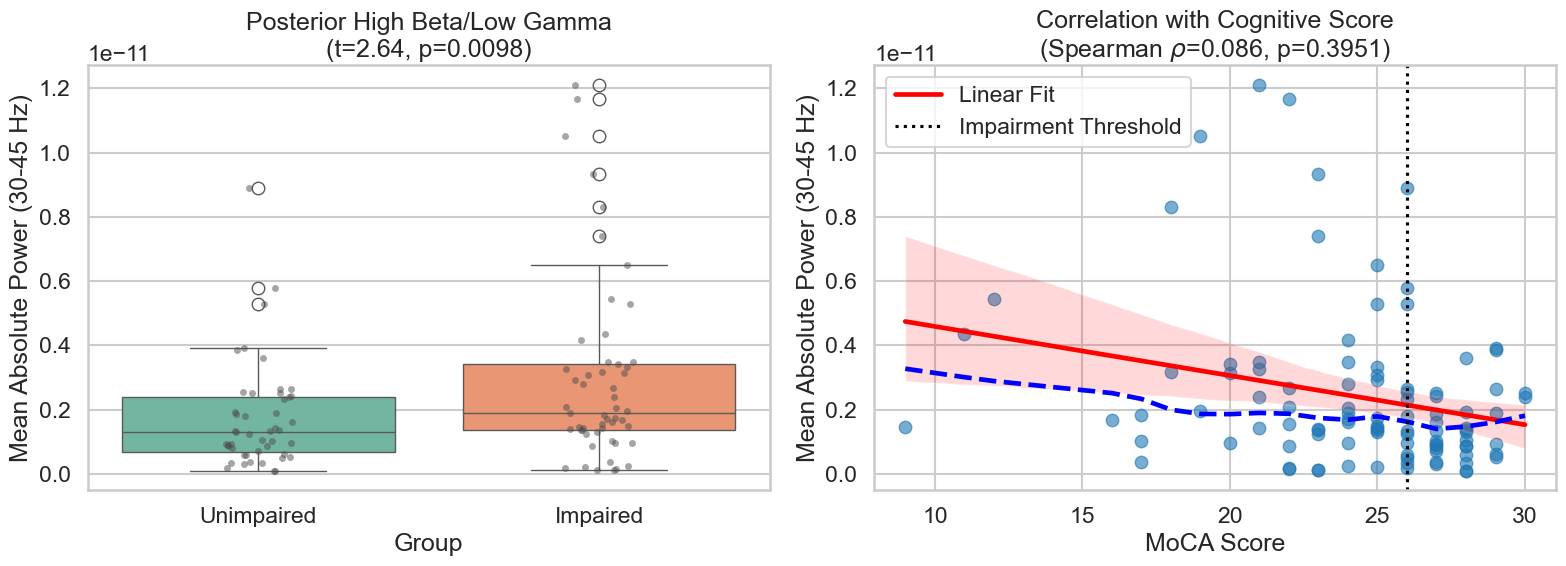

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Setup Data for Plotting
plot_df = pd.DataFrame({
    'Gamma_Power': gamma_data,
    'MoCA_Score': moca_vals_list,
    'Group': ['Impaired' if m < 26 else 'Unimpaired' for m in moca_vals_list]
})

# 2. Visualization
sns.set_context("talk")
sns.set_style("whitegrid")

# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- Left Plot: Group Comparison (Pathology Check) ---
sns.boxplot(x='Group', y='Gamma_Power', data=plot_df, palette='Set2', ax=ax[0], order=['Unimpaired', 'Impaired'])
sns.stripplot(x='Group', y='Gamma_Power', data=plot_df, color=".3", alpha=0.5, ax=ax[0], order=['Unimpaired', 'Impaired'])
ax[0].set_title(f'Posterior High Beta/Low Gamma\n(t={t:.2f}, p={p:.4f})')
ax[0].set_ylabel('Mean Absolute Power (30-45 Hz)')

# --- Right Plot: MoCA Correlation (Compensation/Mechanism Check) ---
# We use regplot with 'lowess=True' to see if there is a non-linear "Inverted-U" shape
sns.regplot(x='MoCA_Score', y='Gamma_Power', data=plot_df, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'label':'Linear Fit'}, ax=ax[1])
sns.regplot(x='MoCA_Score', y='Gamma_Power', data=plot_df, 
            lowess=True, scatter=False, line_kws={'color':'blue', 'linestyle':'--', 'label':'Non-Linear Trend'}, ax=ax[1])

# Highlight the MoCA threshold
ax[1].axvline(x=26, color='black', linestyle=':', label='Impairment Threshold')
ax[1].set_title(f'Correlation with Cognitive Score\n(Spearman $\\rho$={rho:.3f}, p={p_corr:.4g})')
ax[1].set_xlabel('MoCA Score')
ax[1].set_ylabel('Mean Absolute Power (30-45 Hz)')
ax[1].legend()

plt.tight_layout()
plt.savefig('gamma_diagnostic_plot.png', dpi=300)

In [13]:
import os
import numpy as np
import pandas as pd
from tensorpac import Pac
from scipy.stats import spearmanr, ttest_ind
import mne

# --- Config ---
BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
THETA_CH = ['F3', 'F4', 'Fz', 'F5', 'F1', 'F2', 'AF3', 'AF4', 'AFz']  # frontal theta
GAMMA_CH = ['P3','P4','Oz','O2','O1','POz','PO7','PO8']

meta = pd.read_csv("participants.csv")
PD_SUBS = meta.loc[meta['GROUP'] == 'PD', 'participant_id'].tolist()

# PAC object
p = Pac(idpac=(6, 0, 0), f_pha=(4, 8, 1, 0.2), f_amp=(30, 45, 2, 1))

# --- Store results ---
pac_vals_list = []
moca_vals_list = []

for subj in PD_SUBS:
    raw_file = os.path.join(BASE_DIR, subj, f"postICA{subj[-3:]}_raw.fif")  # corrected naming
    if not os.path.exists(raw_file):
        print(f"{subj}: missing raw file")
        continue
    
    raw = mne.io.read_raw_fif(raw_file, preload=True)
    sfreq = raw.info['sfreq']

    # Extract signals
    try:
        theta_signal = raw.copy().pick_channels(THETA_CH).get_data()[0]
    except:
        print(f"{subj}: missing theta channel")
        continue

    try:
        gamma_signal = raw.copy().pick_channels(GAMMA_CH).get_data().mean(axis=0)
    except:
        print(f"{subj}: missing gamma channels")
        continue

    # Filter signals
    phases = p.filter(sfreq, theta_signal, ftype='phase')
    amplitudes = p.filter(sfreq, gamma_signal, ftype='amplitude')

    # Fit PAC
    pac_matrix = p.fit(phases, amplitudes)
    pac_mean = pac_matrix.mean()

    # Store
    pac_vals_list.append(pac_mean)

    moca_vals = meta.loc[meta['participant_id'] == subj, 'MOCA'].values
    if len(moca_vals) == 0 or np.isnan(moca_vals[0]):
        continue
    moca_vals_list.append(moca_vals[0])

# Convert to arrays
pac_vals = np.array(pac_vals_list)
moca_vals_list = np.array(moca_vals_list)

# --- Split impaired vs unimpaired ---
labels = (moca_vals_list < 26).astype(int)
impaired = pac_vals[labels == 1]
unimpaired = pac_vals[labels == 0]

# --- Stats ---
t, p = ttest_ind(impaired, unimpaired, equal_var=False)
rho, p_corr = spearmanr(pac_vals, moca_vals_list)

# --- Output ---
print(f"Frontal theta → posterior gamma PAC | Cohort counts (PD only): {len(pac_vals)}")
print(f"Impaired (MoCA<26): {len(impaired)}, Unimpaired (MoCA>=26): {len(unimpaired)}")
print(f"Impaired mean={impaired.mean():.6g}, std={impaired.std():.6g}")
print(f"Unimpaired mean={unimpaired.mean():.6g}, std={unimpaired.std():.6g}")
print(f"t={t:.3f}, p={p:.6g}, Spearman rho={rho:.3f}, p={p_corr:.6g}")


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-094\postICA094_raw.fif...
    Range : 0 ... 35779 =      0.000 ...   143.116 secs
Ready.
Reading 0 ... 35779  =      0.000 ...   143.116 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-095\postICA095_raw.fif...
    Range : 0 ... 30834 =      0.000 ...   123.336 secs
Ready.
Reading 0 ... 30834  =      0.000 ...   123.336 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-096\postICA096_raw.fif...
    Range : 0 ... 32629 =      0.000 ...   130.516 secs
Ready.
Reading 0 ... 32629  =      0.000 ...   130.516 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-097\postICA097_raw.fif...
    Range : 0 ... 39899 =      0.000 ...   159.596 secs
Ready.
Reading 0 ... 39899  =      0.000 ...   159.596 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-098\postICA098_raw.fif...
    Range : 0 ... 30504 =      0.000 ...   122.016 secs
Ready.
Reading 0 ... 30504  =      0.000 ...   122.016 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-099\postICA099_raw.fif...
    Range : 0 ... 30554 =      0.000 ...   122.216 secs
Ready.
Reading 0 ... 30554  =      0.000 ...   122.216 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Opening raw data file C:\Users\User\Documents\EEG_Project\rEEG\sub-100\postICA100_raw.fif...
    Range : 0 ... 34894 =      0.000 ...   139.576 secs
Ready.
Reading 0 ... 34894  =      0.000 ...   139.576 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    true PAC estimation using Gaussian Copula PAC (gcPac)


Frontal theta → posterior gamma PAC | Cohort counts (PD only): 100
Impaired (MoCA<26): 53, Unimpaired (MoCA>=26): 47
Impaired mean=0.000285799, std=0.000151292
Unimpaired mean=0.000970301, std=0.00352868
t=-1.315, p=0.195145, Spearman rho=0.057, p=0.574834


### Frontal Delta/Theta connectivity

In [7]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, spearmanr

# -------------------------------
# Config
# -------------------------------
BASE_DIR = r"C:\Users\User\Documents\EEG_Project\rEEG"
meta = pd.read_csv(os.path.join(BASE_DIR, "participants.csv"))
MOCA_COL = 'MOCA' if 'MOCA' in meta.columns else 'MoCA'
PD_SUBS = meta.loc[meta['GROUP']=='PD','participant_id'].tolist()

BAND = "alpha"  # frontal delta connectivity

# Frontal channels
FRONTAL_CH = ['FZ','F3','F4','F7','F8','FP1','FP2','FC1','FC2','AF7','AF3','AFZ','AF4','AF8']

# -------------------------------
# Helper
# -------------------------------
def upper_mean(mat):
    """Compute mean of upper triangle, excluding diagonal"""
    if mat.size == 0: 
        return np.nan
    iu = np.triu_indices_from(mat, k=1)
    return np.nanmean(mat[iu])

# -------------------------------
# Main
# -------------------------------
results = []

for subj in PD_SUBS:
    mat_path = os.path.join(BASE_DIR, subj, "data", f"{subj}_{BAND}_pli_matrix.npy")
    epo_path = os.path.join(BASE_DIR, subj, f"epo_{subj.split('-')[-1]}_raw.fif")
    
    if not os.path.exists(mat_path) or not os.path.exists(epo_path):
        print(f"{subj}: missing file(s), skipping")
        continue

    # Load matrix
    mat = np.load(mat_path)
    
    # Get channel indices
    import mne
    epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
    chs = [c.upper() for c in epochs.ch_names]
    f_idx = [chs.index(c) for c in FRONTAL_CH if c in chs]
    if len(f_idx) < 2:
        print(f"{subj}: not enough frontal channels, skipping")
        continue

    # Ensure symmetry
    if not np.allclose(mat, mat.T):
        mat = (mat + mat.T)/2

    f_mean = upper_mean(mat[np.ix_(f_idx, f_idx)])

    moca_val = meta.loc[meta['participant_id']==subj, MOCA_COL].values[0]
    label = 1 if moca_val < 26 else 0

    results.append({
        'subject': subj,
        'frontal_delta_conn': f_mean,
        'MOCA': moca_val,
        'label': label
    })

# -------------------------------
# Stats
# -------------------------------
df = pd.DataFrame(results)
imp = df.loc[df['label']==1, 'frontal_delta_conn']
unimp = df.loc[df['label']==0, 'frontal_delta_conn']

t_stat, p_group = ttest_ind(imp, unimp, equal_var=False)
rho, p_corr = spearmanr(df['frontal_delta_conn'], df['MOCA'])

print(f"Frontal delta connectivity | PD only: N={len(df)}")
print(f"Impaired (MoCA<26): {len(imp)}, Unimpaired: {len(unimp)}")
print(f"Impaired mean={imp.mean():.6g}, std={imp.std():.6g}")
print(f"Unimpaired mean={unimp.mean():.6g}, std={unimp.std():.6g}")
print(f"t={t_stat:.3f}, p={p_group:.6g}")
print(f"Spearman rho={rho:.3f}, p={p_corr:.6g}")

# Optional: save results
# df.to_csv(os.path.join(BASE_DIR, "Frontal_Delta_Connectivity_PD.csv"), index=False)
# print("Results saved.")


C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-001\epo_001_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-002\epo_002_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-003\epo_003_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epo

Frontal delta connectivity | PD only: N=100
Impaired (MoCA<26): 53, Unimpaired: 47
Impaired mean=0.0607181, std=0.0150806
Unimpaired mean=0.0630841, std=0.0179071
t=-0.710, p=0.479714
Spearman rho=0.086, p=0.395146


C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-086\epo_086_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-087\epo_087_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
C:\Users\User\AppData\Local\Temp\ipykernel_35564\419025074.py:47: RuntimeWarning: This filename (C:\Users\User\Documents\EEG_Project\rEEG\sub-088\epo_088_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epo